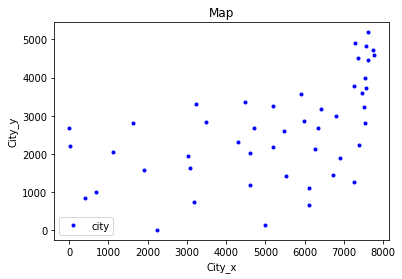

[29, 48, 40, 41, 32, 47, 14, 16, 28, 46, 12, 8, 42, 13, 38, 30, 19, 36, 33, 44, 31, 43, 7, 21, 3, 15, 37, 34, 45, 10, 2, 4, 39, 23, 9, 18, 26, 35, 5, 24, 11, 17, 20, 25, 22, 1, 6, 27]
109034.73239390193


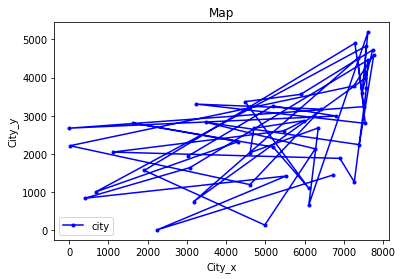

In [51]:
import sys
import numpy as np
import pandas as pd
import random as rd
import math
from matplotlib import pyplot as plt

class GA():
    def __init__(self,populationNum,crossover,mutation,maxIterSize,threshold,data):#这个data考虑要不要改变位置
        #初始化ga用到的参数:
        self.populationNum = populationNum
        self.crossover = crossover
        self.mutation = mutation
        self.maxIterSize =maxIterSize
        self.threshold =threshold
        self.data = data
    def initPop(self,size):
        num = len(self.data) #49
        population = [] 
        for i in range(size):
            List=rd.sample(range(1,num+1),num)
            #遍历看是否有相同的方案舍去
            population.append(List)
        return population
#计算适应度值(越小越好)
def getFitness(data,population):#指的是个体
    cost = 0
    #欧氏距离
    for i in range(len(population)-1):
        #平方之和    
        num = pow(data[population[i]-1][1]-data[population[i+1]-1][1],2)+ pow(data[population[i]-1][2]-data[population[i+1]-1][2],2)
        #平方根
        cost += math.sqrt(num)
    #曼哈顿距离    
#     for i in range(len(population)-1):
#         #population[]=1==data[x][0]
#         
#         cost += abs(data[population[i]-1][1]-data[population[i+1]-1][1]) + abs(data[population[i]-1][2]-data[population[i+1]-1][2])         #曼哈顿距离
#         #最后一个到第一个
#     cost += abs(data[population[len(population)-1]-1][1]-data[population[0]-1][1]) + abs(data[population[len(population)-1]-1][2]-data[population[0]-1][2]) 
    
    getFitness = cost
    return getFitness
#选择Selection
def Selection(data,population): #20个染色体 每个染色体一个方案
    tmp = [] #存选择后的种群
    fitness = []
    total = 0
    bestFit = 10000000
    bestIndex = -1
    badFit = 0
    badIndex = -1
    #得到每个染色体的适应度值
    for i in range(len(population)):
        get = 1/getFitness(data,population[i])
        fitness.append(get)
        total += get
    #得到每个适应度值的占比
    for i in range(len(fitness)):
        fitness[i] = fitness[i]/total
    selecPro = [0]*(len(fitness)+1)
    for i in range(len(fitness)):
        selecPro[i+1] = fitness[i] + selecPro[i]#轮盘赌划分区域
    for i in range(len(population)):
        rand = rd.random()
        for j in range(1,len(selecPro)):
            if(rand<selecPro[j]):
                tmp.append(population[j-1])
                break
    #复制
    for i in range(len(tmp)):
        tmpFitness1 = getFitness(data,population[i])#原始种群s
        tmpFitness2 = getFitness(data,tmp[i])       #新种群s
        if(bestFit>tmpFitness1):
            bestFit = tmpFitness1
            bestIndex = i
        if(badFit<tmpFitness2):
            badFit = tmpFitness2
            BadIndex = i
    tmp[badIndex] = population[bestIndex]
    return tmp


#交叉Crossover:Xcross()函数是随机生成两个交叉点，然后交换交叉点内部的元素。其他元素按照填充法，从第二个交叉点循环将剩余的
                   #元素添加到个体。变异后个体如果比当前最优值适应度高，则将当前最优与变异后个体交换。
def Crossover(data,population,crossover):
    bestFit = 10000000
    bestIndex = -1
    badFit = 0
    badIndex = -1
    for i in range(len(population)):
        tmpFitness1 = getFitness(data,population[i])
        if(bestFit>tmpFitness1):
            bestFit = tmpFitness1
            bestIndex = i
    best = population[bestIndex] #得到最好的一种方案population
    
    for i in range(len(population)-1):
        rand = rd.random() 
        if(rand<crossover):
            cross1 = rd.randint(0,len(population[i]))#生成交叉点1  0-47
            cross2 = rd.randint(0,len(population[i]))#生成交叉点2
        
            pop1,pop2 = cross(population,cross1,cross2,i)
            getFitness(data,pop1)
            if(getFitness(data,pop1)<getFitness(data,population[i])):
                population[i] = pop1
            if(getFitness(data,pop2)<getFitness(data,population[i+1])):
                population[i+1] = pop2
        
    for i in range(len(population)):
        tmpFitness2 = getFitness(data,population[i])
        if(badFit<tmpFitness2):
            badFit = tmpFitness2
            badIndex = i
    population[badIndex] = best
    return population
def cross(population,cross1,cross2,i):#i:0-47
    #先初始化交叉后的两个个体
#     pop1 = population[i]
#     print(len(pop1))
#     pop2 = population[i]
#     print(len(pop2))
#     print(len(population[i+1]))
    #置0
#     for i in range(len(pop1)):
#         pop1[i] = 0
#         pop2[i] = 0
    pop1 = [0]*len(population[i])
    pop2 = [0]*len(population[i])
    m = min(cross1,cross2)
    n = max(cross1,cross2)
    for j in range(m,n):#得到交叉后的新个体
        pop1[j] = population[i+1][j]
        pop2[j] = population[i][j]
    flag = 0
    #jiaochao
    while(flag<(len(population[i])-n+m)):#len(population[i])-n+m表示有几个0要添加#例子：48-10+5
        for j in range(len(pop1)):
            if(pop1[j]==0):
                casual = rd.randint(1,len(population[i])) #1-48的数字编号
                if casual not in pop1:
                    pop1[j] = casual
                    flag += 1
    flag = 0
    while(flag<(len(population[i])-n+m)):#len(population[i])-n+m表示有几个0要添加
        for j in range(len(pop2)):
            if(pop2[j]==0):
                casual = rd.randint(1,len(population[i]))
                if casual not in pop2:
                    pop2[j] = casual
                    flag += 1
    return pop1,pop2    
#变异mutation:对每个基因按照一定的概率进行变异选择，若选中，则随机从剩下的基因中选一个与其交换。
def Mutation(data,population,mutation):
    tmp = []
    bestFit = 10000000
    bestIndex = -1
    badFit = 0
    badIndex = -1
    for i in range(len(population)):
        tmpFitness1 = getFitness(data,population[i])
        if(bestFit>tmpFitness1):
            bestFit = tmpFitness1
            bestIndex = i
    best = population[bestIndex]
        
    for i in range(len(population)):#遍历个体
        old = population[i]
        rand = rd.random()  #生成变异率,达到一定的概率才进行基因变异
        if(rand<mutation):
            first = rd.randint(0,len(population))#从中随机选出一个作交换 0~47
            second = rd.randint(0,len(population))#从中随机选出一个作交换 0~47
            exc = population[i][first]
            population[i][first] = population[i][second]
            population[i][second] = exc          
        if(getFitness(data,population[i])>getFitness(data,old)):#新的比旧的适应度值高
            population[i] = old
    for i in range(len(population)):
        tmpFitness2 = getFitness(data,population[i])
        if(badFit<tmpFitness2):
            badFit = tmpFitness2
            badIndex = i
    population[badIndex] = best            
    return population
#找到最佳fitness方案
def find_Best(data,population):
    bestR = population[0]
    for i in range(1,len(population)):
        #print(getFitness(data,population[i]))
        if(getFitness(data,bestR)>getFitness(data,population[i])):
            bestR = population[i]   
    bestFitness = getFitness(data,bestR)
    return bestR,bestFitness
#读取文件
def read_file():
#     data = r'city_data.txt'
#     data_name = np.loadtxt(data)#用numpy读取数据
#     text = []
#     for i in range(len(data_name)):
#         for j in range(len(data_name[i])):
#             data_name[i][j] = int(data_name[i][j])

    data = []
    for line in open("city_data.txt","r"): #设置文件对象并读取每一行文件   
        data.append(line.strip('\n').split())               #将每一行文件加入到list中
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = int(data[i][j])
    return data
def GA_Algorithm(city,population,maxIterSize,crossover,mutation): 
    for i in range(maxIterSize):
        #选择
        population = Selection(city,population)
        #交叉
        population = Crossover(city,population,crossover)
        #变异
        population = Mutation(city,population,mutation)
#     print(population)
#     print(len(population))
    bestRoad,bestCost = find_Best(city,population)
    return bestRoad,bestCost
#画初始城市
def draw_city(city):
    city_x = []
    city_y = []
    for i in range(len(city)):
        city_x.append(city[i][1])
        city_y.append(city[i][2])
    
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(city_x,city_y,'ro',color='blue',marker='.',label = 'city')
    plt.legend(loc='lower left')#显示图例的位置，这里为右下方
    plt.title('Map')
    plt.xlabel('City_x')#x轴标签
    plt.ylabel('City_y')#y轴标签
    plt.show() 
#画最佳方案
def draw(city,bestRoad):
    city_x = []
    city_y = [] 
    for i in range(len(bestRoad)):
        for j in range(len(city)):
            if(bestRoad[i]==city[j][0]):
                city_x.append(city[i][1])
                city_y.append(city[i][2])
                break
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(city_x,city_y,color='blue',marker='.',label = 'city')
    plt.legend(loc='lower left')#显示图例的位置，这里为右下方
    plt.title('Map')
    plt.xlabel('City_x')#x轴标签
    plt.ylabel('City_y')#y轴标签  
        

        
city = read_file()
#初始化参数：
ga = GA(20,0.8,0.2,100,0.8,city)
draw_city(city)
#初始化种群
population = ga.initPop(ga.populationNum)
#算法实现：
bestRoad,bestCost = GA_Algorithm(city,population,ga.maxIterSize,ga.crossover,ga.mutation)
#作图：规划路线
draw(city,bestRoad)
print(bestRoad)
print(bestCost)